In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Theta(x):
    return (1.+np.sign(x))/2.
xiD = -0.2
beta = 100.
mu = 5.
mu_integer = np.floor(mu*beta/np.pi)
if (mu_integer % 2 == 0): mu_integer += 1
def G(w, L, r):
    if(r==0): return Theta(np.abs(w)-L)/(1j*w-xiD)
    if(r==1): return 1./( 1j*sign(w)*np.maximum(np.abs(w),L) - xiD )
    if(r==2): return ( 1. - np.exp( -(w/L)**2 ) )/(1j*w-xiD)
    if(r==3): return np.exp( - (L/w)**2 * (1.-1j*np.sign(w)) )/(1j*w-xiD)
    if(r==4): return np.exp( - (L/w)**2 * (1.-1j*w/L) )/(1j*w-xiD)#return 1./(1j*w-xiD+1j*L)
def S(w, L, r):
    if(r==0): return -Theta(np.abs(w)+np.pi/beta-L)*Theta(L+np.pi/beta-np.abs(w))/(1j*w-xiD)*beta/(2.*np.pi)
    if(r==1): return -1j*np.sign(w)*Theta(L-np.abs(w))/( (1j*sign(w)*L - xiD)**2 )
    if(r==2): return -2.* (w**2)/(L**3) * np.exp( -(w/L)**2 ) /(1j*w-xiD)
    if(r==3): return -2.*L/(w**2)*(1.-1j*np.sign(w)) *np.exp( - (L/w)**2 * (1.-1j*np.sign(w)) )/(1j*w-xiD)
    if(r==4): return -2.*L/(w**2)*(1.-0.5*1j*w/L) *np.exp( - (L/w)**2 * (1.-1j*w/L) )/(1j*w-xiD)
    
w_neg = np.arange(-mu_integer, 1, 2)*np.pi/beta
w_pos = np.arange(1, mu_integer+2, 2)*np.pi/beta
def BG(w_bar, L, r):
    mywn = w_neg - np.ones_like(w_neg)*w_bar
    mywp = w_pos - np.ones_like(w_pos)*w_bar
    return -1j*np.pi/beta*( -np.sum(G(mywn, L, r)) + np.sum(G(mywp, L, r)) )
def BS(w_bar, L, r):
    mywn = w_neg - np.ones_like(w_neg)*w_bar
    mywp = w_pos - np.ones_like(w_pos)*w_bar
    return -1j*np.pi/beta*( -np.sum(S(mywn, L, r)) + np.sum(S(mywp, L, r)) )
BubG = np.vectorize(BG)
BubS = np.vectorize(BS)

In [3]:
def double(array, sign=1):
    return np.concatenate((sign*(array[1:])[::-1],array))
def read_Pi(path, details=0):
    N = np.loadtxt(path)[0,0]
    beta = np.loadtxt(path)[0,1]
    mu = np.loadtxt(path)[1,0]
    xiD = np.loadtxt(path)[1,1]
    U = np.loadtxt(path)[2,0]
    U_x = np.loadtxt(path)[2,1]
    U_p = np.loadtxt(path)[3,0]
    switch_to_delta = np.loadtxt(path)[3,1]
    with_gamma4 = np.loadtxt(path)[4,0]
    with_Bosonic_Selfenergies = np.loadtxt(path)[4,1]
    PiX_R = np.loadtxt(path)[5:,0]
    PiX_I = np.loadtxt(path)[5:,1]
    freq = np.pi/beta* np.arange(0,2*N,2)
    logfreq = np.sqrt(freq**2 + xiD**2)
    if(details==0):
        return PiX_R
    elif(details==1):
        return PiX_R, freq, double(freq,-1), logfreq, N, beta, mu, xiD, U
    elif(details==2):
        return PiX_I
def read_V(path):
    return np.loadtxt(path)[:,0]

In [4]:
path = '../plot_data/'#'../../checkCorr/withAsymptoticsData/'
C_r1_l1, freq, dfreq, logfreq, N, beta, mu, xiD, U = read_Pi(path+'C_AB_r1_l1_N100.dat', 1)
C_r1 = [C_r1_l1[0:int(N)]]; V_r1 = []; C_rk_r1 = [];
for l in range(1, 14):
    if(l==1):
        temp = read_V(path+'IpK1_AB_r1_l'+str(l)+'_N100.dat')[0:int(N)]
        V_r1.append(temp)
    elif(l>9):
        temp = read_V(path+'IpK1_RKa_r1_l'+str(l)+'_N100.dat')[0:int(N)]
        V_r1.append(temp)
        temp = read_Pi(path+'C_RKa_r1_l'+str(l)+'_N100.dat')[0:int(N)]
        C_r1.append(temp)
    elif(l>1):
        temp = read_V(path+'IpK1_AB_r1_l'+str(l)+'_N100.dat')[0:int(N)]
        V_r1.append(temp)
        temp = read_Pi(path+'C_AB_r1_l'+str(l)+'_N100.dat')[0:int(N)]
        C_r1.append(temp)
    if (l < 5):
        temp2 = read_Pi(path+'C_r1_l'+str(l)+'_N100.dat')[0:int(N)]; C_rk_r1.append(temp2)
C_r0 = []; V_r0 = []; C_rk_r0 = []
for l in range(1, 12):
    if(l>9):
        temp = read_V(path+'IpK1_RKa_r0_l'+str(l)+'_N100.dat')[0:int(N)]
        V_r0.append(temp)
        temp = read_Pi(path+'C_RKa_r0_l'+str(l)+'_N100.dat')[0:int(N)]
        C_r0.append(temp)
    else:
        temp = read_V(path+'IpK1_AB_r0_l'+str(l)+'_N100.dat')[0:int(N)]
        V_r0.append(temp)
        temp = read_Pi(path+'C_AB_r0_l'+str(l)+'_N100.dat')[0:int(N)]; 
        C_r0.append(temp)
    if (l < 8):
        temp2 = read_Pi(path+'C_r0_l'+str(l)+'_N100.dat')[0:int(N)]; C_rk_r0.append(temp2)
C_r2 = []; V_r2 = []
for l in range(1, 14):
    temp = read_V(path+'IpK1_AB_r2_l'+str(l)+'_N100.dat')[0:int(N)]
    V_r2.append(temp)
    temp = read_Pi(path+'C_AB_r2_l'+str(l)+'_N100.dat')[0:int(N)]
    C_r2.append(temp)
C_r3 = []; V_r3 = []
for l in range(1, 14):
    temp = read_V(path+'IpK1_AB_r3_l'+str(l)+'_N100.dat')[0:int(N)]
    V_r3.append(temp)
    temp = read_Pi(path+'C_AB_r3_l'+str(l)+'_N100.dat')[0:int(N)]
    C_r3.append(temp)
#temp = read_Pi(path+'C_AB_r3_l'+str(5)+'_N100.dat')[0:int(N)]; C_r3.append(temp); C_r3.append(temp)
C_r4 = []
for l in range(1, 7):
    temp = read_Pi(path+'C_AB_oscf2_r3_l'+str(l)+'_N100.dat')[0:int(N)]
    C_r4.append(temp)
C_p = read_Pi(path+'C_parquet_100_500_1000.dat')[0:int(N)]
C_p_full = read_Pi(path+'C_parquet_100_500_1000.dat') + 1j*read_Pi(path+'C_parquet_100_500_1000.dat', 2)
print N, mu, xiD, U

40.0 5.0 -0.2 0.28


In [5]:
fsf = .5
styles = ['--', '-', ':', '-.']
dashstyles = [[1.2,2], [4, 2, 1, 2], [4, 2, 1, 2, 1, 2], [3,3], [4, 2, 1, 2, 1, 2, 1, 2]]
colors = ['darkblue', '#50B895', '#5080ED', 'lightskyblue', 'palevioletred', 'darkmagenta']
colors_inset = ['#782424', '#A17373']#'#A91111'
#colors = ['#332288', '#88CCEE', '#44AA99', '#117733', '#CC6677', '#AA4499']#, '#999933', '#DDCC77', '#882255'

In [6]:
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman']})
rc('text', usetex=True)
rcParams['axes.linewidth'] = fsf*0.8
rcParams['xtick.major.size'] = fsf*5
rcParams['xtick.major.width'] = fsf*0.5
rcParams['ytick.major.size'] = fsf*5
rcParams['ytick.major.width'] = fsf*0.5
rcParams['xtick.minor.size'] = fsf*3
rcParams['xtick.minor.width'] = fsf*0.3
rcParams['ytick.minor.size'] = fsf*3
rcParams['ytick.minor.width'] = fsf*0.3
rcParams['font.size'] = fsf*20
rcParams['legend.fontsize'] = fsf*18
#rcParams.keys()
inset_fs = fsf*18
legend_fs = fsf*17
mylw = fsf*1.5 #linewidth
mylw_inset = fsf*1.2
myms = fsf*8.8 #markersize
myms_inset = fsf*5.
mymew = fsf*0.8 #markeredgewidth
mymew_inset = fsf*0.4
labels = [r'$\ell=1$', r'$2$', r'$3$', r'$4$', r'$5$']
colors = ['darkblue', 'mediumaquamarine', '#5080ED', 'lightskyblue', '#E378A1', 'darkmagenta']
colors_inset = ['#782424', '#A17373']
zorders = [2, 3, 4, 5, 1]

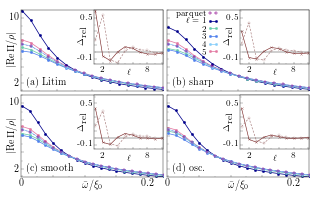

In [9]:
xfreq = freq/mu
lxfreq = logfreq/mu
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(fsf*8., fsf*6)) 
for i in range(2):
    yticks = np.arange(2, 12, 2); ax[i,0].set_yticks(yticks); ax[i,0].set_yticks(yticks+1, minor=True) 
    #if (i==0):       
    ax[i,0].set_yticklabels(['2','','','','10']); 
    ax[i,0].set_ylabel(r'$|$Re$\,\Pi/\rho|$', position=(0., 0.52), va='top', labelpad=2)
    #else:
    #    ax[i,0].set_yticklabels([str(y) for y in yticks])
       
    for j in range(2):#, dashes=[3.5,4]
        ax[i,j].plot(xfreq, -C_p, '+-', markeredgewidth=mymew*1.2, color=colors[-1], zorder=10, label='parquet', lw=mylw/3., ms=myms*1.1, dashes=[2, 2])#marker='D', markerfacecolor='None', marker='x-'
        ax[i,j].set_xlim(-0.001, 0.201); ax[i,j].set_ylim(1, 11.); 
        ax[i,j].xaxis.set_ticks_position('bottom'); ax[i,j].yaxis.set_ticks_position('left')
        ax[i,j].set_xticks([0,.05,.1,.15,.2]); ax[1,j].set_xticklabels(['0','','','','0.2'])
        ax[i,j].set_xticks([.025,.075,.125,.175,.225], minor=True); 
        ax[i,j].tick_params(axis='both', which='major', pad=2)
        #if (j==1):
        ax[1,j].set_xlabel(r'$\bar{\omega} / \xi_0$', position=(0.5, 0.), va='bottom', labelpad=4)
        if(i==0 and j==0):
            for l in range(5):
                ax[i,j].plot(xfreq, -C_r1[l], '.-', color=colors[l], zorder=zorders[l], label=labels[l], lw=mylw, ms=myms)
                #ax[i,j].plot(xfreq, -C_rk_r1[l], '.-', zorder=zorders[l], lw=mylw, ms=myms)
        if(i==0 and j==1):
            for l in range(5):
                ax[i,j].plot(xfreq, -C_r0[l], '.-', color=colors[l], zorder=zorders[l], label=labels[l], lw=mylw, ms=myms)
                #ax[i,j].plot(xfreq, -C_rk_r0[l], '.-', zorder=zorders[l], lw=mylw, ms=myms)
        if(i==1 and j==0):
            for l in range(5):
                ax[i,j].plot(xfreq, -C_r2[l], '.-', color=colors[l], zorder=zorders[l], label=labels[l], lw=mylw, ms=myms)
        if(i==1 and j==1):
            for l in range(5):
                ax[i,j].plot(xfreq, -C_r3[l], '.-', color=colors[l], zorder=zorders[l], label=labels[l], lw=mylw, ms=myms)
for i in range(2):
    for j in range(2):
        ax_in = fig.add_axes([0.2524+0.5076*j, 0.65-0.397*i, 0.24, 0.25])
        ax_in.xaxis.set_ticks_position('bottom'); ax_in.yaxis.set_ticks_position('left')
        
        ax_in.set_xlim(0.8,10.1); ax_in.plot([1,10.2], [0,0], 'k', lw=mylw/2.); #ax_in.plot([1,10.2], [0.02,0.02], 'k', lw=mylw/2.); ax_in.plot([1,10.2], [-0.02,-0.02], 'k', lw=mylw/2.)
        ax_in.set_xticks([2,4,6,8,10]); ax_in.set_xticks([1,3,5,7,9], minor=True); 
        ax_in.set_xticklabels(['2','','','8',''], fontsize=inset_fs);
        ax_in.set_xlabel(r'$\ell$', position=(0.5, 0.), va='bottom', labelpad=3, fontsize=inset_fs)
        ax_in.set_ylim(-0.17,0.62)
        ax_in.set_yticks([-.1,.1,.3,.5]); ax_in.set_yticklabels(['-0.1','','','0.5'], fontsize=inset_fs);
        ax_in.set_yticks([0,.2,.4,.6], minor=True); 
        ax_in.set_ylabel(r'$\Delta_{\textrm{rel}}$', position=(0., 0.5), va='top', labelpad=-1, fontsize=inset_fs)  
        ax_in.tick_params(axis='both', which='major', pad=2)
        
        if(i==0 and j==0):
            lmax = 12; lx = [l for l in range(1,lmax+1)]
            ax_in.plot(lx, [(C_r1[l][0]/C_p[0]-1.) for l in range(lmax)], 'x-', markeredgewidth=mymew_inset, lw=mylw_inset, ms=myms_inset, color=colors_inset[0])
            ax_in.plot(lx, [(V_r1[l][0]/0.28**2/C_r1[l][0]-1.) for l in range(lmax)], '+', markeredgewidth=mymew_inset, dashes=[2.1,1.4], lw=mylw_inset, ms=myms_inset*1.3, color=colors_inset[1])
        if(i==0 and j==1):
            lmax = 11; lx = [l for l in range(1,lmax+1)]
            ax_in.plot(lx, [(C_r0[l][0]/C_p[0]-1.) for l in range(lmax)], 'x-', markeredgewidth=mymew_inset, lw=mylw_inset, ms=myms_inset, color=colors_inset[0])
            ax_in.plot(lx, [(V_r0[l][0]/0.28**2/C_r0[l][0]-1.) for l in range(lmax)], '+:', markeredgewidth=mymew_inset, dashes=[2.1,1.4], lw=mylw_inset, ms=myms_inset*1.3, color=colors_inset[1])
        if(i==1 and j==0):
            lmax = 13; lx = [l for l in range(1,lmax+1)]
            ax_in.plot(lx, [(C_r2[l][0]/C_p[0]-1.) for l in range(lmax)], 'x-', markeredgewidth=mymew_inset, lw=mylw_inset, ms=myms_inset, color=colors_inset[0])
            ax_in.plot(lx, [(V_r2[l][0]/0.28**2/C_r2[l][0]-1.) for l in range(lmax)], '+:', markeredgewidth=mymew_inset, dashes=[2.1,1.4], lw=mylw_inset, ms=myms_inset*1.3, color=colors_inset[1])
        if(i==1 and j==1):
            lmax = 13; lx = [l for l in range(1,lmax+1)]
            ax_in.plot(lx, [(C_r3[l][0]/C_p[0]-1.) for l in range(lmax)], 'x-', markeredgewidth=mymew_inset, lw=mylw_inset, ms=myms_inset, color=colors_inset[0])
            ax_in.plot(lx, [(V_r3[l][0]/0.28**2/C_r3[l][0]-1.) for l in range(lmax)], '+:', markeredgewidth=mymew_inset, dashes=[2.1,1.4], lw=mylw_inset, ms=myms_inset*1.3, color=colors_inset[1])

ax[0,1].legend(bbox_to_anchor=(0.415, 1.085), ncol=1, handlelength=1.3, labelspacing=0, handletextpad=0.1, columnspacing=.6, frameon=False, markerfirst=False, fontsize=legend_fs)      
#legend = ax[0,0].legend(bbox_to_anchor=(1.6, -1.25), ncol=5, handlelength=1.3, labelspacing=0, handletextpad=0.1, columnspacing=.6)
#legend.get_frame().set_linewidth(fsf*0.8)            
ax[0,0].text(0.006, 1.75, '(a) Litim'); ax[0,1].text(0.006, 1.75, '(b) sharp'); ax[1,0].text(0.006, 1.75, '(c) smooth'); ax[1,1].text(0.006, 1.75, '(d) osc.')
fig.subplots_adjust(left=0., bottom=None, right=1., top=None, wspace=0.03, hspace=0.05)
plt.savefig("multiloop_numerics.pdf", bbox_inches="tight")

In [9]:
N = 600
w_bos = np.arange(0, N+2, 2)*np.pi/beta
w_fer = np.arange(1, N+3, 2)*np.pi/beta
L = 1.; r = 1.
ImS = []; ImG = []; ReBS = []; ReBG = []
for r in np.array([0., 1., 2., 3.]):
    tImS = imag(S(w_fer, L, r)); ImS.append(tImS)
    tImG = imag(G(w_fer, L, r)); ImG.append(tImG)
    tReBS = np.abs( real(BubS(w_bos, L, r)) ); ReBS.append(tReBS)
    tReBG = np.abs( real(BubG(w_bos, L, r)) ); ReBG.append(tReBG)
reglist = [r'$\delta$', 'L.', 'sm.', 'osc.']

In [10]:
def parquet_real(w, u, mu, xiD):
    z = (-1j*w-xiD)**2 / (mu**2)
    return ( 1./(2.*u) * (1. - np.exp(-u*np.log(z)) ) ).real
def parquet_abs(w, u, mu, xiD):
    z = (-1j*w-xiD)**2 / (mu**2)
    return np.abs( ( 1./(2.*u) * np.exp(-u*np.log(z)) ) )

#ulist = np.array([0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.39])
#pilist = np.array([-5.32, -5.75, -6.14, -6.49, -6.77, -6.94, -7.03, -7.01, -6.92])
ulist2 = np.array([.04,.08,.12,.16,.2,.24,.28,.32,.36,.4,.44])
pilist2 = np.array([-3.67815,-4.18713,-4.74279,-5.32031,-5.88256,-6.38391,-6.77775,-6.98172,-7.03548,-6.90214,-6.60048])

myu = np.linspace(0.01, 0.5, 20)
pi1 = parquet_real(0, myu, 5, -0.2)
pi2 = parquet_real(0, myu-0.5*myu**2, 5, -0.2)
pi3 = parquet_real(0, myu-0.5*myu**2-1.7*myu**3, 5, -0.2)
piparquet = parquet_abs(w_bos, 0.28, 5., -0.2)
w_shifted = np.sqrt(w_bos**2+0.2**2)

In [11]:
import matplotlib.gridspec as gridspec

In [12]:
fsf = .5
reglist = ['sharp', 'L.', 'sm.', 'osc.']
styles = ['--', '-', ':', '-.']
colors = ['#CC2529', '#3E9651', '#396AB1', '#DA7C30']

In [13]:
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman']})
rc('text', usetex=True)
rcParams['axes.linewidth'] = fsf*0.8
rcParams['xtick.major.size'] = fsf*5
rcParams['xtick.major.width'] = fsf*0.5
rcParams['ytick.major.size'] = fsf*5
rcParams['ytick.major.width'] = fsf*0.5
rcParams['xtick.minor.size'] = fsf*3
rcParams['xtick.minor.width'] = fsf*0.3
rcParams['ytick.minor.size'] = fsf*3
rcParams['ytick.minor.width'] = fsf*0.3
rcParams['font.size'] = fsf*20
rcParams['legend.fontsize'] = fsf*18
#rcParams.keys()
inset_fs = fsf*18
inset_legend_fs = fsf*16
mylw = fsf*1
mylw2 = fsf*2
myms = fsf*3; myms_array = fsf*np.array([1.8, 4, 3, 3])
myms2 = fsf*10
mylw_inset = fsf*1
myms_inset = fsf*2
colors = ['#5080ED', 'darkblue', 'lightskyblue', '#50B895', 'palevioletred', 'darkmagenta']
colors_inset = ['#782424', '#A17373']
colors2 = ['darksalmon', 'peru', 'saddlebrown', 'firebrick', 'deeppink']
zorders = [2, 1, 3, 4]

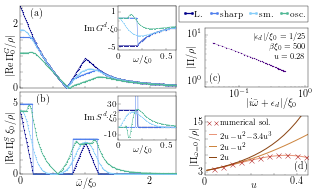

In [14]:
fig = plt.figure(figsize=(fsf*8,fsf*6))
gs1 = gridspec.GridSpec(2, 1); gs1.update(left=0., right=0.54, hspace=0.05); ax = []
ax1 = fig.add_subplot(gs1[0]); ax.append(ax1); ax2 = fig.add_subplot(gs1[1]); ax.append(ax2)
gs2 = gridspec.GridSpec(2, 1); gs2.update(left=0.54+0.1, right=1., top=0.8, bottom=0.12, hspace=0.5)
ax3 = fig.add_subplot(gs2[0]); ax.append(ax3); ax4 = fig.add_subplot(gs2[1]); ax.append(ax4)

for r in [1, 0, 2, 3]:
    ax1.plot(w_bos/5., ReBG[r], '.-', color=colors[r], zorder=zorders[r], lw=mylw, ms=myms, label=reglist[r])
    ax2.plot(w_bos/5., ReBS[r]*5., '.-', color=colors[r], zorder=zorders[r], lw=mylw, ms=myms)
ax1.plot(w_bos[16:65]/5., ReBG[1][16:65], '.', color=colors[1], zorder=1, ms=myms*1.5)
ax1.plot(w_bos[97:]/5., ReBG[1][97:], '.', color=colors[1], zorder=1, ms=myms*1.5)
    
i=0; ax[i].set_xlim(0, 2.4); ax[i].set_ylim(0, 2.55)
ax[i].set_xticklabels([]); 
ax[i].set_yticks([0, .5, 1, 1.5, 2., 2.5]); ax[i].set_yticklabels(['0','','','','2'])
ax[i].set_yticks([.25, .75, 1.25, 1.75, 2.25], minor=True)
i=1; ax[i].set_xlim(0, 2.4); ax[i].set_ylim(0, 5*1.15)
ax[i].set_xticks([0, 0.5, 1., 1.5, 2.]); ax[i].set_xticklabels(['0','','','','2']); 
ax[i].set_xticks([0.25, 0.75, 1.25, 1.75, 2.25], minor=True); 
ax[i].set_yticks([0,1,2,3,4,5]); ax[i].set_yticklabels(['0','','','','','5'])
ax[i].set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5], minor=True)

ax1.set_ylabel(r'$|$Re$\,\Pi_0^G\!/\rho|$', position=(0., 0.41), va='top', labelpad=6)
ax2.set_xlabel(r'$\bar{\omega} / \xi_0$', position=(0.42, 0.), va='bottom', labelpad=4)
ax2.set_ylabel(r'$|$Re$\,\Pi_0^S\,\xi_0/\rho|$', position=(0., 0.455), va='top', labelpad=6)
legend = ax1.legend(bbox_to_anchor=(1.882, 1.055), ncol=4, handlelength=1.3, labelspacing=0, handletextpad=0., columnspacing=.6, markerscale=3)
legend.get_frame().set_linewidth(fsf*0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(mylw*2.5)

ax_in = []; ax_in1 = fig.add_axes([0.34, 0.7, 0.2, 0.2]); ax_in.append(ax_in1)
ax_in2 = fig.add_axes([0.34, 0.284, 0.2, 0.2]); ax_in.append(ax_in2)
for r in [1, 0, 2, 3]:
    ax_in1.plot(w_fer/5., ImG[r]*5, '.-', color=colors[r], zorder=zorders[r], lw=mylw_inset, ms=myms_inset)
    ax_in2.plot(w_fer/5., ImS[r]*25, '.-', color=colors[r], zorder=zorders[r], lw=mylw_inset, ms=myms_inset)
ax_in1.plot(w_fer[17:]/5., ImG[1][17:]*5, '.', color=colors[1], zorder=1, ms=myms_inset*1.5)
ax_in2.plot(w_fer[17:]/5., ImS[1][17:]*25, '.', color=colors[1], zorder=1, ms=myms_inset*1.5)
    
i=0
ax_in[i].set_xlim(0, 0.6); ax_in[i].set_ylim(-5.5, 2)
ax_in[i].set_xticks([0, 0.25, 0.5]); ax_in[i].set_yticks([-5, -2, 1])
ax_in[i].set_xticklabels(['0','','0.5'], fontsize=inset_fs); ax_in[i].set_yticklabels(['-5','','1'], fontsize=inset_fs)
ax_in[i].set_xticks([0.125, 0.375], minor=True); ax_in[i].set_yticks([-3.5, -.5], minor=True)
ax_in[i].set_ylabel(r'Im$\,G^d\!\!\cdot\!\xi_0$', position=(0., 0.5), va='center', ha='center', rotation=0, labelpad=8, fontsize=inset_fs)
i=1
ax_in[i].set_xlim(0, 0.6); ax_in[i].set_ylim(-16, 40)
ax_in[i].set_xticks([0, 0.25, 0.5]); ax_in[i].set_yticks([-10, 10, 30])
ax_in[i].set_xticklabels(['0','','0.5'], fontsize=inset_fs); ax_in[i].set_yticklabels(['-10','','30'], fontsize=inset_fs)
ax_in[i].set_xticks([0.125, 0.375], minor=True); ax_in[i].set_yticks([0, 20], minor=True)
ax_in[i].set_ylabel(r'Im$\,S^d\!\!\cdot\!\xi_0^2$', position=(0., 0.5), va='center', ha='center', rotation=0, labelpad=3, fontsize=inset_fs)

#ax3.loglog(w_shifted[:40]/5., np.abs(piparquet[:40]), lw=fsf*mylw, ms=fsf*myms); 
#ax3.loglog(w_shifted[:60]/5., np.abs(piparquet2[:60]), lw=fsf*mylw, ms=fsf*myms); 
ax3.loglog(w_shifted[:40]/5., np.abs(C_p_full[:40]), '.-', color='indigo', label='parquet', lw=fsf*mylw, ms=fsf*myms*2)
#ax3.loglog(w_shifted[:60]/5., np.abs(C_p_full[:60]-2.46), '.-', label='parquet', lw=fsf*mylw, ms=fsf*myms)
i=2    
ax[i].set_xlim(.03, 1.1); ax[i].set_ylim(0.8, 14)
ax[i].set_xticks([.1,1]); ax[i].set_xticks([.03,.04,.05,.06,.07,.08,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9], minor=True); ax[i].set_yticks([1, 10])
ax[i].xaxis.set_minor_formatter(FormatStrFormatter('%f'))
ax[i].xaxis.set_tick_params(which='both', pad=fsf*8);
ax[i].set_xticklabels([r'$10^{-1}$',r'$10^{0}$']); ax[i].set_xticklabels([], minor=True)#'','','','','','','','','',r'$2\cdot10^{0}$'], minor=True)
ax[i].set_yticklabels([r'$10^{0}$',r'$10^{1}$'])
ax[i].set_xlabel(r'$|i\bar{\omega}+\epsilon_d| / \xi_0$', position=(0.65, 0.), va='top', labelpad=0)
ax[i].set_ylabel(r'$|\Pi/\rho|$', position=(0., 0.525), va='top', labelpad=0)

mypi = [pi3, pi2, pi1]; pilabel = [r'$2u\!-\!u^2\!-\!3.4u^3$', r'$2u\!-\!u^2$', r'$2u$']
#ax4.plot(ulist, -pilist, 'x', ms=fsf*myms*2)
ax4.plot(ulist2, -pilist2, 'x', ms=myms2, color=colors2[3], zorder = 10, label='numerical sol.')#label='num. parquet')
for p in range(3):
    ax4.plot(myu, -mypi[p], label=pilabel[p], lw=mylw2, color=colors2[p])
ax4.legend(bbox_to_anchor=(0.73, 1.06), frameon=False, fontsize=inset_legend_fs, handlelength=1.5, handletextpad=0.2, markerscale=0.8); i=3
ax[i].set_xlim(0, 0.45); ax[i].set_ylim(2.2, 16.5)
ax[i].set_xticks([0, .1, .2, .3, .4]); ax[i].set_yticks([3, 7, 11, 15])
ax[i].set_xticklabels(['0','','','','0.4']); ax[i].set_yticklabels(['3','','','15'])
ax[i].set_xticks([.05, .15, .25, .35], minor=True); ax[i].set_yticks([5, 9, 13], minor=True)
ax[i].set_xlabel(r'$u$', position=(0.48, 0.), va='bottom', labelpad=3)
ax[i].set_ylabel(r'$|\Pi_{\bar{\omega}=0}/\rho|$', position=(0., 0.495), va='top', labelpad=2)

for i in range(2):
    ax_in[i].xaxis.set_ticks_position('bottom'); ax_in[i].yaxis.set_ticks_position('left')
    ax_in[i].set_xlabel(r'$\omega / \xi_0$', position=(0.42, 0.), va='bottom', labelpad=4, fontsize=inset_fs)
    ax[i].xaxis.set_ticks_position('bottom'); ax[i].yaxis.set_ticks_position('left')
    ax[i+2].xaxis.set_ticks_position('bottom'); ax[i+2].yaxis.set_ticks_position('left')
    ax[i].tick_params(axis='both', which='major', pad=2); ax_in[i].tick_params(axis='both', which='major', pad=2)
ax[3].tick_params(axis='both', which='major', pad=2)
ax1.text(0.15, 2.25, '(a)'); ax2.text(0.25, 5.05, '(b)'); ax4.text(0.39, 3.6, '(d)'); ax3.text(0.035, 1.1, '(c)')
mytext = [r'$|\epsilon_d| /\xi_0=1/25$', r'$\beta \xi_0=500$', '$u=0.28$']; ycoord=[7.8, 4.9, 3.2]; xcoord=[0.161, 0.278, 0.34]
#ax3.plot([0.85,0.85],[2,11])
for i in range(3):
    ax3.text(xcoord[i], ycoord[i], mytext[i], fontsize=inset_legend_fs)
#ax3.text(0.035, 1.8, '(c)'); ax3.text(0.036, 1.1, 'numerical parquet', fontsize=inset_legend_fs);
#plt.savefig("regulators_and_parquet.pdf", bbox_inches="tight")